Text(0.5, 0, 'Count of Job Postings')

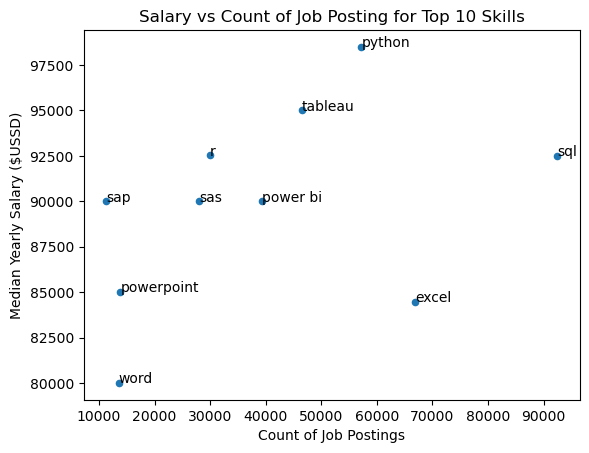

In [13]:
import ast 
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../pandas/data_jobs.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

def scatter_charts(x):
    if pd.notna(x):
        return ast.literal_eval(x)
    else:
        return x
df['job_skills'] = df['job_skills'].apply(scatter_charts)
df = df[df['job_title_short'] == 'Data Analyst']
df_explode = df.explode('job_skills')
skill_stat = df_explode.groupby('job_skills').agg(
    skill_count = ('job_skills','count'),
    median_salary = ('salary_year_avg','median')
)
skill_stats = skill_stat.sort_values(by='skill_count',ascending=False).head(10)
skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')


for i,txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],txt)
plt.title('Salary vs Count of Job Posting for Top 10 Skills')
plt.ylabel('Median Yearly Salary ($USSD)')
plt.xlabel('Count of Job Postings')